# Maximum likelihood

In Bayesian modelling, the **likelihood**, $L$, is the name given to the measure of the goodness of fit between the model, with some given variables, and the data. 
When the likelihood is maximised, $\hat{L}$, the most probable statistical model has been found for the given data. 

In this tutorial we will see how `uravu` can be used to maximize the likelihood of a model for some dataset.

In `uravu`, the likelihood is calculated as follows, 

$$ \ln L = -0.5 \sum_{i=1}^n \bigg[ \frac{(y_i - m_i) ^2}{s_i^2} + \ln(2 \pi s_i^2) \bigg], $$

where, $y$ is the data ordinate, $m$ is the model ordinate, and $s$ is, 

$$ s_i^2 = \delta y_i^2 + f^2 m_i^2 $$,

where $\delta y$ is the uncertainty in $y$ and $f$ is the fraction of unaccounted uncertainty (more about this can be found in the [Unaccounted uncertainty](./unaccounted_uncertainty.html) tutorial.)
`uravu` is able to maximize this function using the [scipy.optimize.minimize()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function (we minimize the negative of the likelihood).

Before we maximise the likelihood, is it necessary to create some *synthetic* data to analyse. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
x = np.linspace(0, 10, 20)
y = np.exp(0.5 * x) * 4
y += y * np.random.randn(20) * 0.1
dy = y * 0.2

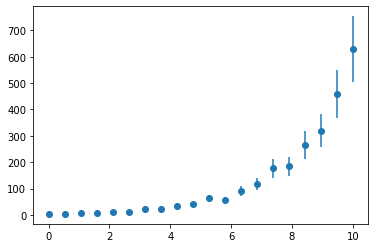

In [4]:
plt.errorbar(x, y, dy, marker='o', ls='')
plt.show()

The data plotted above may be modelled with the following relationship, 

$$ y = a\exp(bx), $$

where $a$ and $b$ are the variables of interest in the modelling process. 
We want to find the values for these variables, which maximises the likelihood. 

First, we must write a function to describe the model.

In [5]:
def my_model(x, a, b):
    """
    A function to describe the model under investgation.
    
    Args:
        x (array_like): Abscissa data.
        a (float): The pre-exponential factor.
        b (float): The x-multiplicative factor.
    
    Returns
        y (array_like): Ordinate data.
    """
    return a * np.exp(b * x)

With our model defined, we can construct a `Relationship` object. 

In [6]:
from uravu.relationship import Relationship

In [7]:
modeller = Relationship(my_model, x, y, dy)

In [8]:
print(modeller)

Function Name: my_model 
Abscissa: [ 0.00e+00 5.26e-01 ... 9.47e+00 1.00e+01 ] 
Ordinate: [ 4.65e+00 4.89e+00 ... 4.58e+02 6.28e+02 ] 
Ordinate uncertainty: [ 9.30e-01 9.77e-01 ... 9.16e+01 1.26e+02 ]
Abscissa Name: x 
Ordinate Name: y 
Abscissa Unit: dimensionless 
Ordinate Unit: dimensionless 
Variables: [ 1.00e+00 1.00e+00 ] 
Unaccounted uncertainty: False 
MCMC performed: False 
Nested sampling performed: False 



The `Relationship` object gives us access to a few powerful Bayesian modelling methods.
However, this tutorial is focused on maximising the likelihood, this is achieved with the `max_likelihood()` class method. 

In [9]:
modeller.max_likelihood()

In [10]:
print(modeller.variables)

[3.82070367 0.50131519]


We can see that the variables have changed to be close to the values used in the data synthesis. 

Let's inspect the model visually. 
This can be achieved easily with the `plotting` module in `uravu`.

In [11]:
from uravu import plotting

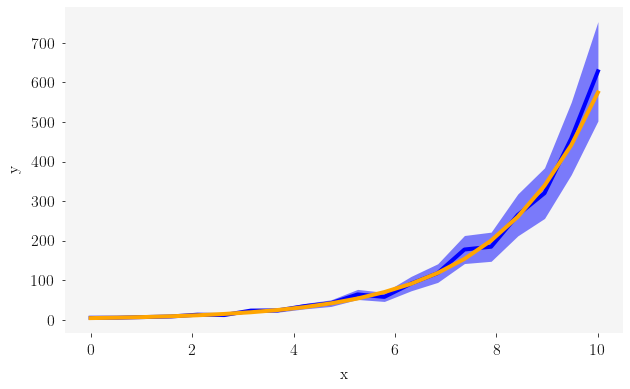

In [12]:
ax = plotting.plot_relationship(modeller)
plt.show()

Above, we can see that the orange line of maximum likelihood agrees well with the data. 